In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, accuracy_score

In [19]:
df = pd.read_csv('SBILIFE_day.csv')

In [20]:
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.normal(size=100) * 2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [23]:
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [24]:


threshold = np.median(y)
y_train_binary = (y_train > threshold).astype(int)
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train_binary)




LogisticRegression()

In [25]:
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")



Linear Regression MSE: 3.671012987885715


In [26]:

y_pred_poly = model_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly}")



Polynomial Regression MSE: 3.646463944509997


In [27]:

y_pred_logistic = model_logistic.predict(X_test)
accuracy = accuracy_score((y_test > threshold).astype(int), y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy}")



Logistic Regression Accuracy: 0.9


In [28]:

next_month_features = np.array([[10]]) 
next_month_prediction_lr = model_lr.predict(next_month_features)
next_month_prediction_poly = model_poly.predict(next_month_features)
next_month_prediction_logistic = model_logistic.predict(next_month_features)



In [29]:
print(f"Next month's stock prediction (Linear Regression): {next_month_prediction_lr}")
print(f"Next month's stock prediction (Polynomial Regression): {next_month_prediction_poly}")
print(f"Next month's stock prediction (Logistic Regression): {next_month_prediction_logistic}")

Next month's stock prediction (Linear Regression): [25.37371678]
Next month's stock prediction (Polynomial Regression): [24.70155705]
Next month's stock prediction (Logistic Regression): [1]


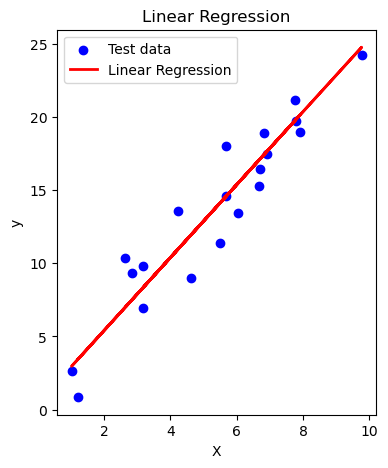

In [30]:
plt.figure(figsize=(14, 5))


plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()




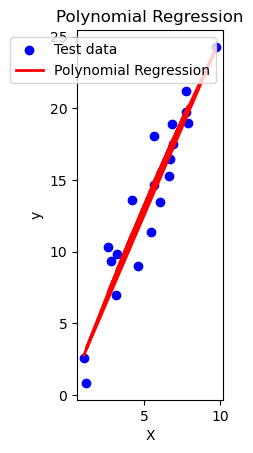

In [31]:

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred_poly, color='red', linewidth=2, label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


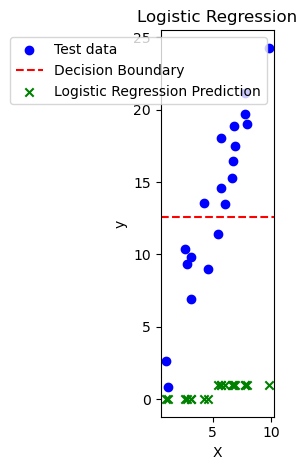

In [32]:

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.axhline(threshold, color='red', linestyle='--', label='Decision Boundary')
plt.scatter(X_test, y_pred_logistic, color='green', marker='x', label='Logistic Regression Prediction')
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()